# Tarefa 04

In [70]:
from PIL import Image as img
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt
from statistics import median

corredor = img.open("corredor_claro.jpg")

#cria o mapa de pixels
def pixelMap(image):
    return image.load()
#filtro sal e pimenta
def sal_pimenta(image, porcentagem):
    
    img = image.copy()
    
    pixels = pixelMap(img)
    num = int(img.size[0]*img.size[1]*porcentagem)
    p = True
    for i in range(num):    # for every col:
        a, b = rd.randint(0,(img.size[0]-1)),rd.randint(0,(img.size[1]-1))
        if p:
            pixels[a,b] = (255,255,255)
            p=False
        else:
            pixels[a,b] = (0,0,0)
            p=True
    return img

def plot(img1, img2, img3):
    fig = plt.figure(figsize=(100,100))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(img1)
    a.set_title('Imagem 1')

    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(img2)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Imagem 2')
    
    a=fig.add_subplot(1,3,3)
    imgplot = plt.imshow(img3)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Média')

def add_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]+2), int(img1.size[1]+2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            px0[i+1, j+1] = px1[i,j]
    return img0

def del_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]-2), int(img1.size[1]-2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img0.size[0]):
        for j in range(img0.size[1]):
            px0[i,j] = px1[i+1, j+1]
    return img0

def list_img(image, n):
    if n < 2 or n>50:
        print("n deve estar no intervalo [2,50]!!!")
    else:
        
        l = []
        for i in range(n):
            l.append(sal_pimenta(image, 0.01))
        return l

def img_list_media(lista):
    n = len(lista)
    img_result = img.new("RGB", (int(lista[0].size[0]), int(lista[0].size[1])), color=0)
    
    px = pixelMap(img_result)
    
    for i in range(img_result.size[0]):
        for j in range(img_result.size[1]):
            sum_r, sum_g, sum_b = 0, 0, 0
            for k in range(n):
                
                px_aux = pixelMap(lista[k])
                
                sum_r += int(px_aux[i,j][0])
                sum_g += int(px_aux[i,j][1])
                sum_b += int(px_aux[i,j][2])
            px[i,j] = (int(sum_r/n),int(sum_g/n),int(sum_b/n))
            
    return img_result

def f_mediana(image):
    img = image.copy()
    px = pixelMap(img)
    
    for i in range(1,(img.size[0]-1)):
        for j in range(1,(img.size[1]-1)):
            px[i,j] = median([ px[i-1,j-1] , px[i,j-1] , px[i+1,j-1],
                               px[i-1,j]   , px[i,j]   , px[i+1,j],
                               px[i-1,j+1] , px[i,j+1] , px[i+1,j+1] ])
    return img

In [73]:
lista = list_img(corredor, 10)
img_media = img_list_media(lista)
img_resultante = f_mediana(img_media)

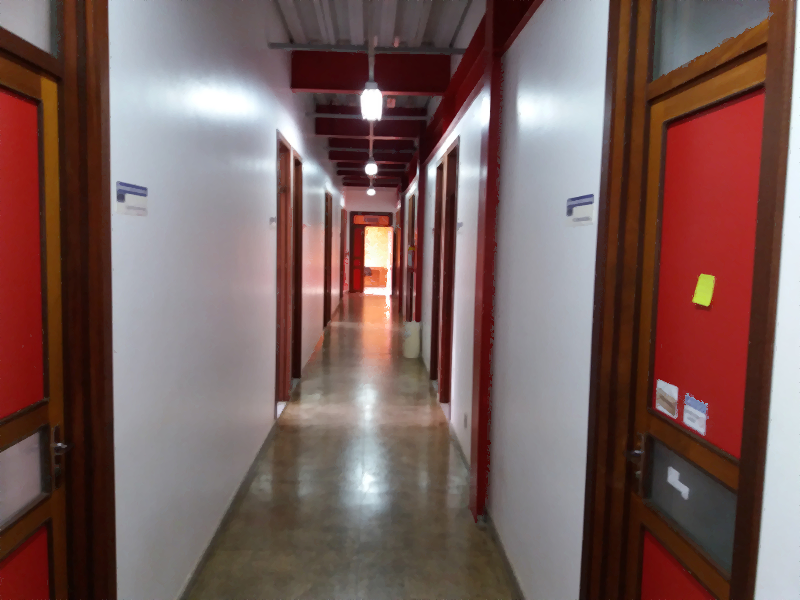

In [75]:
img_resultante

## Salvando os arquivos:

In [77]:
img_media.save("./resource/img/Tarefa04/media_n.jpg")
img_resultante.save("./resource/img/Tarefa04/resultado.jpg")
for i in range(len(lista)):
    lista[i].save("./resource/img/Tarefa04/sal_pimenta_"+str(i)+".jpg")